In [16]:
import email, os

def parse_email(file_path):
    with open(file_path, 'rb') as f:
        msg = email.message_from_bytes(f.read())

    subject = msg.get('Subject')
    if subject is None:
        subject = ""  
    elif isinstance(subject, email.header.Header):
        subject = str(subject)  
    body = msg.get_payload()

    if isinstance(body, list):  
        body = body[0].get_payload()
    
    body = str(body).strip()  

    return subject, body


In [17]:
ham_folder = r"C:\Users\nsjhj\Python_stuff\extracted_ham\easy_ham"
ham_files = os.listdir(ham_folder)
ham_files.sort()
spam_folder = r"C:\Users\nsjhj\Python_stuff\extracted_spam\spam"
spam_files = os.listdir(spam_folder)
spam_files.sort()

ham_emails = []
spam_emails = []
for filename in ham_files:
    file_path = os.path.join(ham_folder, filename)
    subject, body = parse_email(file_path)
    ham_emails.append((subject + " " + body, 0))  # 0: Ham
for filename in spam_files:
    file_path = os.path.join(spam_folder, filename)
    subject, body = parse_email(file_path)
    spam_emails.append((subject + " " + body, 1))  # 1: Spam

all_emails = ham_emails + spam_emails


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
   
 
    #  **Replace URLs with 'URL'**
    text = re.sub(r'https?://\S+|www\.\S+', ' URL ', text)  # Replace URLs
    
    # Remove email headers (From, Date, Message-ID, etc.)**
    text = re.sub(r'(?m)^(From|Date|To|Cc|Bcc|Subject|Message-ID|Reply-To|Received|Content-Type|MIME-Version|X-[^:]+):.*$', '', text)

    # **Remove email addresses & domain names**
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '', text)  # Remove email addresses
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b', '', text)  # Remove domain names

    # **Remove numbers & special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    # **Tokenization & Stopword Removal**
    tokens = text.lower().split()  # Convert to lowercase & split words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
all_emails_cleaned = [(preprocess_text(email[0]), email[1]) for email in all_emails]

# Extract cleaned email text and labels
X = [email[0] for email in all_emails_cleaned]  # Processed text
y = [email[1] for email in all_emails_cleaned]  # Labels (0 = ham, 1 = spam)
# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 important words
X_tfidf = vectorizer.fit_transform(X)

# Print dataset shape
print(f"✅ TF-IDF Feature Matrix Shape: {X_tfidf.shape}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsjhj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ TF-IDF Feature Matrix Shape: (3002, 5000)


In [19]:
all_emails_cleaned = [(preprocess_text(email[0]), email[1]) for email in all_emails]

print("Original:", all_emails[0][0][:300])  
print("Post-Preprocess:", all_emails_cleaned[0][0][:300])  # 


Original: Re: New Sequences Window Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without
Post-Preprocess: new sequences window date wed aug chris garrigues message id reproduce error repeatable like every time without fail debug log pick happening pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence me


In [20]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print(f" Training set: {X_train.shape[0]} emails")
print(f" Test set: {X_test.shape[0]} emails")

 Training set: 2401 emails
 Test set: 601 emails


In [21]:
#4-6
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    
}

# Train and evaluate each classifier
for name, model in classifiers.items():
    print(f"🔹 Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(f" {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 80)


🔹 Training Naive Bayes...
 Naive Bayes Results:
Accuracy: 0.9550748752079867
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       497
           1       0.99      0.75      0.85       104

    accuracy                           0.96       601
   macro avg       0.97      0.87      0.91       601
weighted avg       0.96      0.96      0.95       601

--------------------------------------------------------------------------------
🔹 Training Logistic Regression...
 Logistic Regression Results:
Accuracy: 0.956738768718802
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       497
           1       1.00      0.75      0.86       104

    accuracy                           0.96       601
   macro avg       0.98      0.88      0.92       601
weighted avg       0.96      0.96      0.95       601

--------------------------------------------------------------------------------
🔹 Training KNN 

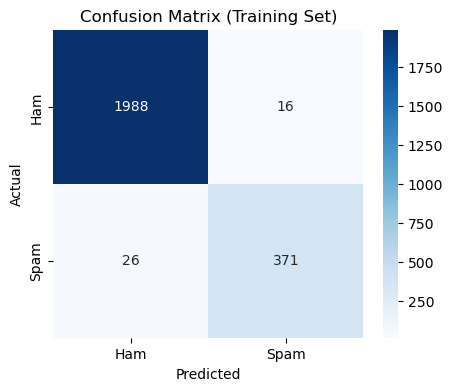

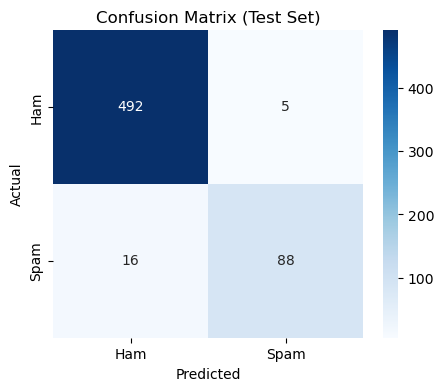

📌 Classification Report (Training Set):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2004
           1       0.96      0.93      0.95       397

    accuracy                           0.98      2401
   macro avg       0.97      0.96      0.97      2401
weighted avg       0.98      0.98      0.98      2401

📌 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       497
           1       0.95      0.85      0.89       104

    accuracy                           0.97       601
   macro avg       0.96      0.92      0.94       601
weighted avg       0.96      0.97      0.96       601



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Train KNN on the full training dataset
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Confusion Matrix for Training Set
plot_confusion_matrix(y_train, y_train_pred, "Confusion Matrix (Training Set)")

# Confusion Matrix for Test Set
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix (Test Set)")

# Classification Report for Training Set
print("📌 Classification Report (Training Set):\n")
print(classification_report(y_train, y_train_pred))

# Classification Report for Test Set
print("📌 Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))


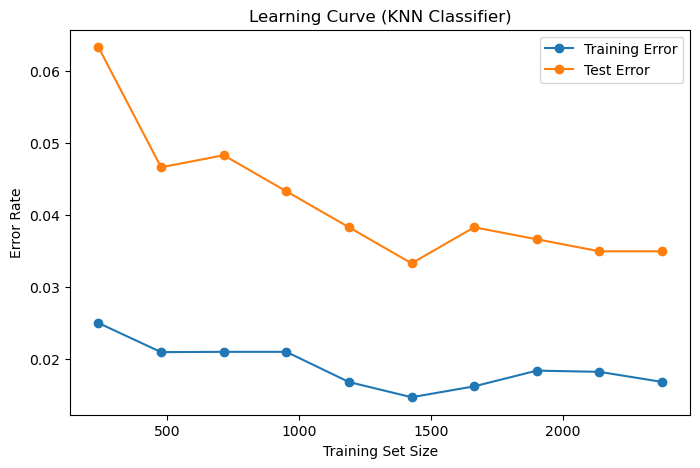

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Convert sparse matrix to dense NumPy array
X_train_dense = X_train.toarray()

# Define training set sizes to test (from 10% to 99%)
train_sizes = np.linspace(0.1, 0.99, 10)  # Avoid 1.0
train_errors = []
test_errors = []

# Train and evaluate KNN with different training sizes
for size in train_sizes:
    # Select a subset of the training data
    X_train_subset, _, y_train_subset, _ = train_test_split(
        X_train_dense, y_train, train_size=min(0.99, size), random_state=42
    )

    # Train the classifier
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train_subset)

    # Predict on training and test sets
    y_train_pred = knn_model.predict(X_train_subset)
    y_test_pred = knn_model.predict(X_test.toarray())  # Convert X_test as well

    # Calculate error rates
    train_errors.append(1 - accuracy_score(y_train_subset, y_train_pred))  # Training error = 1 - accuracy
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))  # Test error = 1 - accuracy

# Plot the learning curve
plt.figure(figsize=(8,5))
plt.plot(train_sizes * len(X_train_dense), train_errors, 'o-', label="Training Error")
plt.plot(train_sizes * len(X_train_dense), test_errors, 'o-', label="Test Error")
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Learning Curve (KNN Classifier)")
plt.legend()
plt.show()

#Training error decreasing as training size increases.
#Test error initially decreasing, then stabilizing


In [25]:
feature_names = np.array(vectorizer.get_feature_names_out())
X_spam = X_tfidf[np.array(y) == 1]  # Spam emails
X_ham = X_tfidf[np.array(y) == 0]   # Ham emails

X_spam = X_spam.toarray()
X_ham = X_ham.toarray()

spam_token_probs = (X_spam.sum(axis=0) + 1) / (X_spam.sum() + len(feature_names))
ham_token_probs = (X_ham.sum(axis=0) + 1) / (X_ham.sum() + len(feature_names))
token_spam_ratios = np.log(spam_token_probs / ham_token_probs)

top_spam_indices = np.argsort(-token_spam_ratios)[:10]  # Sort in descending order

top_spam_tokens = feature_names[top_spam_indices]

# Print results
print(" Top 10 Most Indicative Spam Words:\n", top_spam_tokens)


 Top 10 Most Indicative Spam Words:
 ['font' 'td' 'br' 'tr' 'align' 'arial' 'width' 'nbsp' 'href' 'color']
